In [3]:

from google.colab import files 
 
uploaded = files.upload()

Saving NIFTY 50.csv to NIFTY 50.csv


In [8]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['NIFTY 50.csv']))
print(df)
data = pd.read_csv("NIFTY 50.csv", parse_dates = ["Date"], index_col = "Date")
data.info()

            Date      Open      High       Low     Close     Volume  \
0     2000-01-03   1482.15   1592.90   1482.15   1592.20   25358322   
1     2000-01-04   1594.40   1641.95   1594.40   1638.70   38787872   
2     2000-01-05   1634.55   1635.50   1555.05   1595.80   62153431   
3     2000-01-06   1595.80   1639.00   1595.80   1617.60   51272875   
4     2000-01-07   1616.60   1628.25   1597.20   1613.30   54315945   
...          ...       ...       ...       ...       ...        ...   
5348  2021-07-01  15755.05  15755.55  15667.05  15680.00  224921644   
5349  2021-07-02  15705.85  15738.35  15635.95  15722.20  254808999   
5350  2021-07-05  15793.40  15845.95  15762.05  15834.35  207032153   
5351  2021-07-06  15813.75  15914.20  15801.00  15818.25  391410742   
5352  2021-07-07  15819.60  15893.55  15779.70  15879.65  329308646   

          Turnover    P/E   P/B  Div Yield  
0     8.841500e+09  25.91  4.63       0.95  
1     1.973690e+10  26.67  4.76       0.92  
2     3.0847

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
data

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23


In [10]:
df = data.loc["2000":, "Close"].to_frame()
df["Return"] = df.Close.pct_change()
df.columns = ["Close", "Return"]
df.dropna(inplace = True)
df

,Close,Return
Date,,
2000-01-04,1638.70,0.029205
2000-01-05,1595.80,-0.026179
2000-01-06,1617.60,0.013661
2000-01-07,1613.30,-0.002658
2000-01-10,1632.95,0.012180
...,...,...
2021-07-01,15680.00,-0.002640
2021-07-02,15722.20,0.002691
2021-07-05,15834.35,0.007133


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

In [12]:
df["Position"] = -np.sign(df["Return"])

In [13]:
df

,Close,Return,Position
Date,,,
2000-01-04,1638.70,0.029205,-1.0
2000-01-05,1595.80,-0.026179,1.0
2000-01-06,1617.60,0.013661,-1.0
2000-01-07,1613.30,-0.002658,1.0
2000-01-10,1632.95,0.012180,-1.0
...,...,...,...
2021-07-01,15680.00,-0.002640,1.0
2021-07-02,15722.20,0.002691,-1.0
2021-07-05,15834.35,0.007133,-1.0


In [14]:
df["strategy_return"] = df["Position"].shift() * df["Return"]
df

,Close,Return,Position,strategy_return
Date,,,,
2000-01-04,1638.70,0.029205,-1.0,NaN
2000-01-05,1595.80,-0.026179,1.0,0.026179
2000-01-06,1617.60,0.013661,-1.0,0.013661
2000-01-07,1613.30,-0.002658,1.0,0.002658
2000-01-10,1632.95,0.012180,-1.0,0.012180
...,...,...,...,...
2021-07-01,15680.00,-0.002640,1.0,-0.002640
2021-07-02,15722.20,0.002691,-1.0,0.002691
2021-07-05,15834.35,0.007133,-1.0,-0.007133


In [15]:
df["Strategy"] = df.strategy_return.add(1, fill_value=0).cumprod() * df.iloc[0,0]
df

,Close,Return,Position,strategy_return,Strategy
Date,,,,,
2000-01-04,1638.70,0.029205,-1.0,NaN,1638.700000
2000-01-05,1595.80,-0.026179,1.0,0.026179,1681.600000
2000-01-06,1617.60,0.013661,-1.0,0.013661,1704.572102
2000-01-07,1613.30,-0.002658,1.0,0.002658,1709.103296
2000-01-10,1632.95,0.012180,-1.0,0.012180,1729.920181
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,1.0,-0.002640,11.880701
2021-07-02,15722.20,0.002691,-1.0,0.002691,11.912675
2021-07-05,15834.35,0.007133,-1.0,-0.007133,11.827700


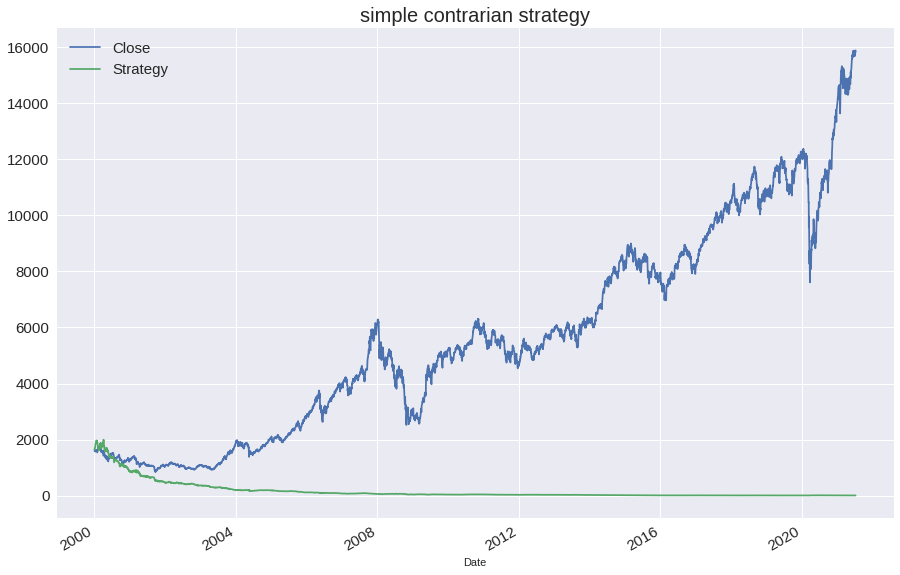

In [16]:
df[["Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("simple contrarian strategy", fontsize = 20)
plt.show()

In [17]:
def summary_ann(returns):
  summary = returns.agg(["mean", "std"]).T
  summary["Return"] = summary["mean"] * 252
  summary["Risk"] = summary["std"] *np.sqrt(252)
  summary.drop(columns = ["mean", "std"], inplace = True)
  return summary

In [18]:
summary_ann(df[["Return", "strategy_return"]])

,Return,Risk
Return,0.134772,0.229724
strategy_return,-0.205450,0.229424


In [19]:
df

,Close,Return,Position,strategy_return,Strategy
Date,,,,,
2000-01-04,1638.70,0.029205,-1.0,NaN,1638.700000
2000-01-05,1595.80,-0.026179,1.0,0.026179,1681.600000
2000-01-06,1617.60,0.013661,-1.0,0.013661,1704.572102
2000-01-07,1613.30,-0.002658,1.0,0.002658,1709.103296
2000-01-10,1632.95,0.012180,-1.0,0.012180,1729.920181
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,1.0,-0.002640,11.880701
2021-07-02,15722.20,0.002691,-1.0,0.002691,11.912675
2021-07-05,15834.35,0.007133,-1.0,-0.007133,11.827700


In [20]:
data

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23


In [21]:
df = data.loc["2000":, "Close"].to_frame()
df["Return"] = df.Close.pct_change()
df.columns = ["Close", "Return"]
df.dropna(inplace = True)
df

,Close,Return
Date,,
2000-01-04,1638.70,0.029205
2000-01-05,1595.80,-0.026179
2000-01-06,1617.60,0.013661
2000-01-07,1613.30,-0.002658
2000-01-10,1632.95,0.012180
...,...,...
2021-07-01,15680.00,-0.002640
2021-07-02,15722.20,0.002691
2021-07-05,15834.35,0.007133


In [163]:
df["Position"] = np.where(df["Return"] > 0.001, 1, -1)
df 

,Close,Return,Position,Strategy_Return,Strategy
Date,,,,,
2000-01-04,1638.70,0.029205,1,NaN,1.686558e+03
2000-01-05,1595.80,-0.026179,-1,-0.026179,1.730711e+03
2000-01-06,1617.60,0.013661,1,-0.013661,1.754354e+03
2000-01-07,1613.30,-0.002658,-1,-0.002658,1.759017e+03
2000-01-10,1632.95,0.012180,1,-0.012180,1.780442e+03
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,-1,0.002640,1.020230e+26
2021-07-02,15722.20,0.002691,1,-0.002691,1.022975e+26
2021-07-05,15834.35,0.007133,1,0.007133,1.030273e+26


In [164]:
df["Strategy_Return"] = df["Position"].shift() * df["Return"]
df

,Close,Return,Position,Strategy_Return,Strategy
Date,,,,,
2000-01-04,1638.70,0.029205,1,NaN,1.686558e+03
2000-01-05,1595.80,-0.026179,-1,-0.026179,1.730711e+03
2000-01-06,1617.60,0.013661,1,-0.013661,1.754354e+03
2000-01-07,1613.30,-0.002658,-1,-0.002658,1.759017e+03
2000-01-10,1632.95,0.012180,1,-0.012180,1.780442e+03
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,-1,0.002640,1.020230e+26
2021-07-02,15722.20,0.002691,1,-0.002691,1.022975e+26
2021-07-05,15834.35,0.007133,1,0.007133,1.030273e+26


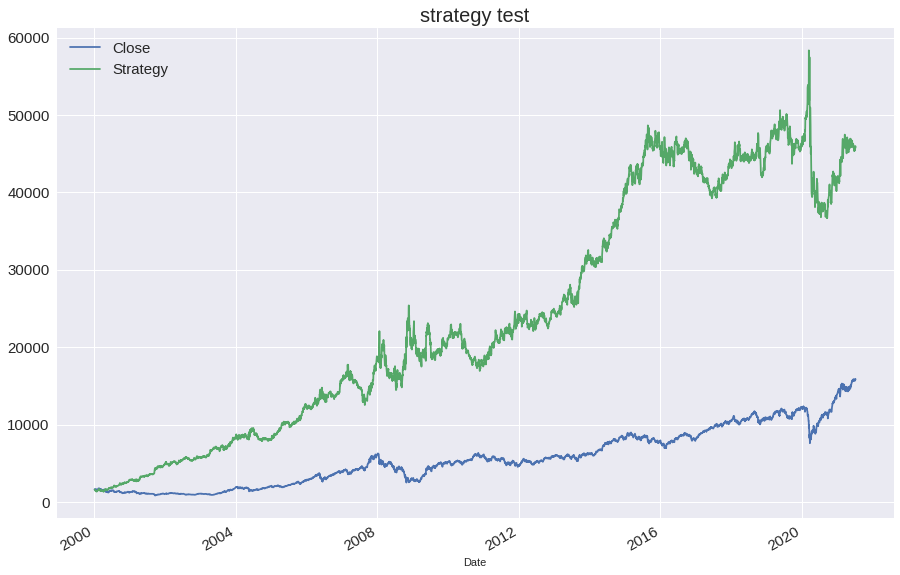

In [165]:
df["Strategy"] = df.Strategy_Return.add(1, fill_value= 0).cumprod() * df.iloc[0,0]
df[["Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("strategy test", fontsize = 20)
plt.show()

Simple moving average strategy

In [166]:
data
df = data.loc["2000":, "Close"].to_frame()
df["Return"] = df.Close.pct_change()
df.columns = ["Close", "Return"]
df.dropna(inplace = True)
df
df.Close.rolling(window = 50).mean()

Date
2000-01-04          NaN
2000-01-05          NaN
2000-01-06          NaN
2000-01-07          NaN
2000-01-10          NaN
                ...    
2021-07-01    15275.350
2021-07-02    15301.671
2021-07-05    15331.531
2021-07-06    15358.196
2021-07-07    15382.728
Name: Close, Length: 5352, dtype: float64

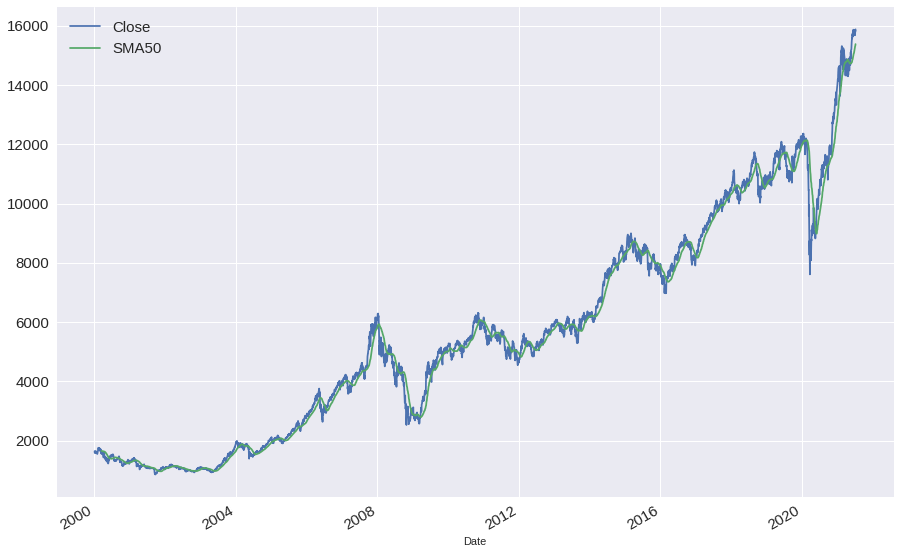

In [167]:
df["SMA50"] = df.Close.rolling(window = 50).mean()
df[["Close", "SMA50"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

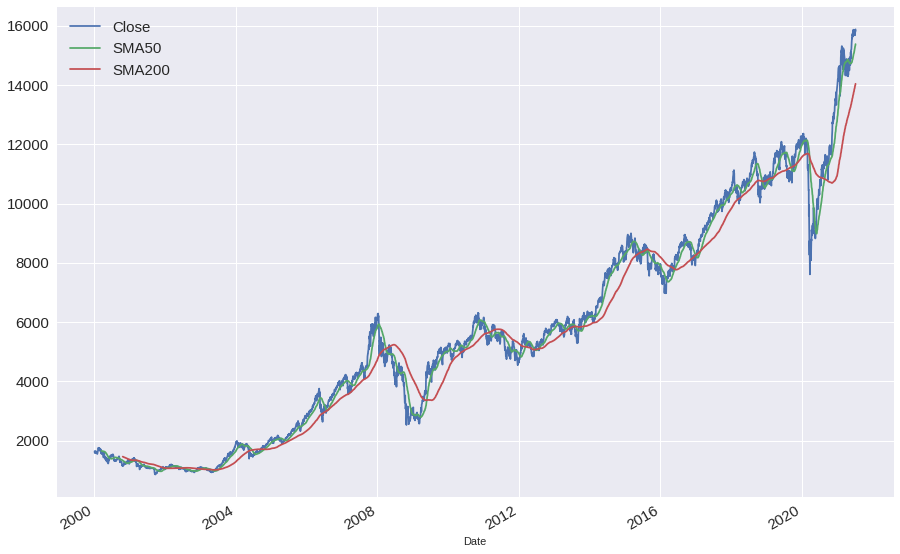

In [168]:
df["SMA200"] = df.Close.rolling(window = 200).mean()
df[["Close", "SMA50", "SMA200"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Buy and hold  - initially investing into nifty and do nothing (posiion 1 on all days)


1.   long : SMA50 > SMA200
2.   short : SMA50 < SMA200


In [169]:
df.dropna(inplace = True)
df["Position"] = np.sign(df.SMA50.sub(df.SMA200))
df

,Close,Return,SMA50,SMA200,Position
Date,,,,,
2000-10-20,1172.00,0.005017,1324.791,1457.52525,-1.0
2000-10-23,1143.95,-0.023933,1320.771,1455.05150,-1.0
2000-10-24,1152.45,0.007430,1317.260,1452.83475,-1.0
2000-10-25,1183.90,0.027290,1314.723,1450.66625,-1.0
2000-10-26,1186.30,0.002027,1312.091,1448.53125,-1.0
...,...,...,...,...,...
2021-07-01,15680.00,-0.002640,15275.350,13957.00950,1.0
2021-07-02,15722.20,0.002691,15301.671,13978.29825,1.0
2021-07-05,15834.35,0.007133,15331.531,14000.26975,1.0


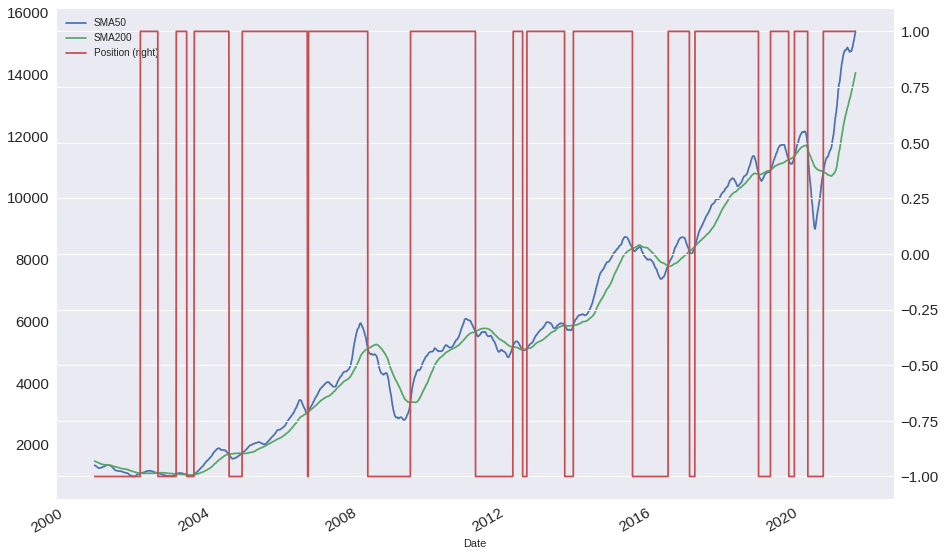

In [170]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15,10), secondary_y = "Position", fontsize = 15)
plt.show()

In [171]:
df["Strategy_Return"] = df["Position"].shift() * df["Return"]
df["Strategy"] = df.Strategy_Return.add(1, fill_value = 0).cumprod() * df.iloc[0,0]

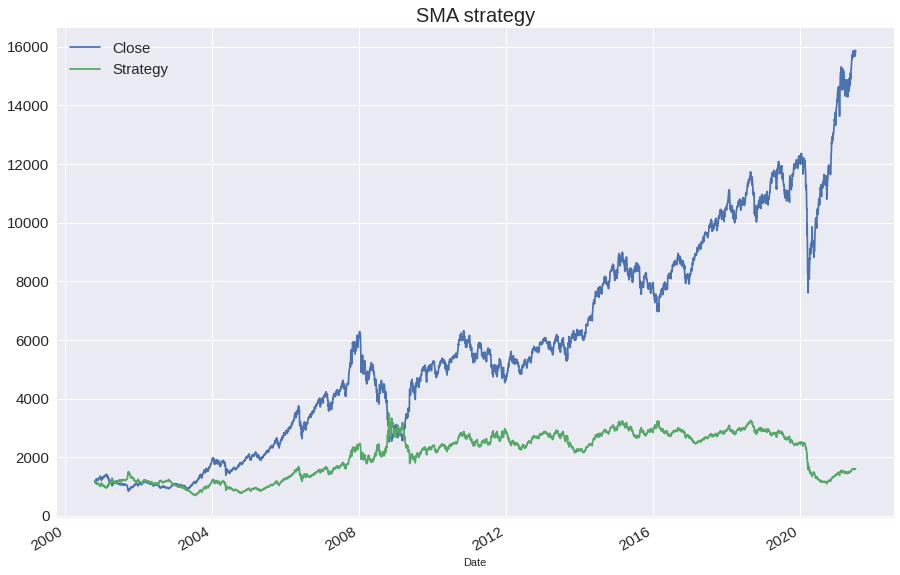

In [172]:
df[["Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA strategy", fontsize = 20)
plt.show()

In [173]:
summary_ann(df[["Return", "Strategy"]])

,Return,Risk
Return,0.153144,0.225147
Strategy,518880.517542,12041.397322


Perfect strategy

In [174]:
data


,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.735997e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801542e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497654e+11,28.53,4.27,1.23


In [175]:
df = data.loc["2000":, "Close"].to_frame()
df["Return"] = df.Close.pct_change()
df.columns = ["Close", "Return"]
df.dropna(inplace = True)
df

,Close,Return
Date,,
2000-01-04,1638.70,0.029205
2000-01-05,1595.80,-0.026179
2000-01-06,1617.60,0.013661
2000-01-07,1613.30,-0.002658
2000-01-10,1632.95,0.012180
...,...,...
2021-07-01,15680.00,-0.002640
2021-07-02,15722.20,0.002691
2021-07-05,15834.35,0.007133


In [176]:
df["Position"] = np.sign(df["Return"])


In [177]:
df

,Close,Return,Position
Date,,,
2000-01-04,1638.70,0.029205,1.0
2000-01-05,1595.80,-0.026179,-1.0
2000-01-06,1617.60,0.013661,1.0
2000-01-07,1613.30,-0.002658,-1.0
2000-01-10,1632.95,0.012180,1.0
...,...,...,...
2021-07-01,15680.00,-0.002640,-1.0
2021-07-02,15722.20,0.002691,1.0
2021-07-05,15834.35,0.007133,1.0


In [178]:
df["Strategy_Return"] = df["Position"] *df["Return"]
df["Strategy"] = df.Strategy_Return.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

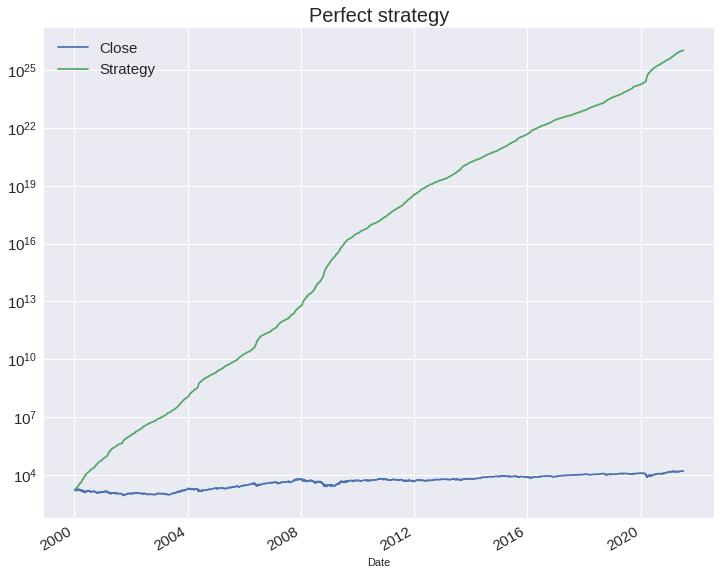

In [187]:
df[["Close", "Strategy"]].plot(figsize = (12, 10), fontsize = 15 ,logy=True)
plt.legend(fontsize = 15)
plt.title("Perfect strategy", fontsize = 20)
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30)
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
model = LinearRegression()
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [191]:
poly_features = poly.fit_transform(X_train.reshape(-1,1))
from pandas.core.common import random_state
model = LinearRegression()
svr_poly = SVR(kernel="rbf", C=100, gamma="auto")
#model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
# Fit linear model using the train data set
model.fit(poly_features, y_train)
fitting = model.predict(poly_features)
#model_rf.fit(X_train, y_train)
fitting

array([10592.28423563, 12797.66590926,  3035.75190855, ...,
        6538.95357971, 13021.97770048,  5843.51739047])

<Figure size 1152x720 with 0 Axes>

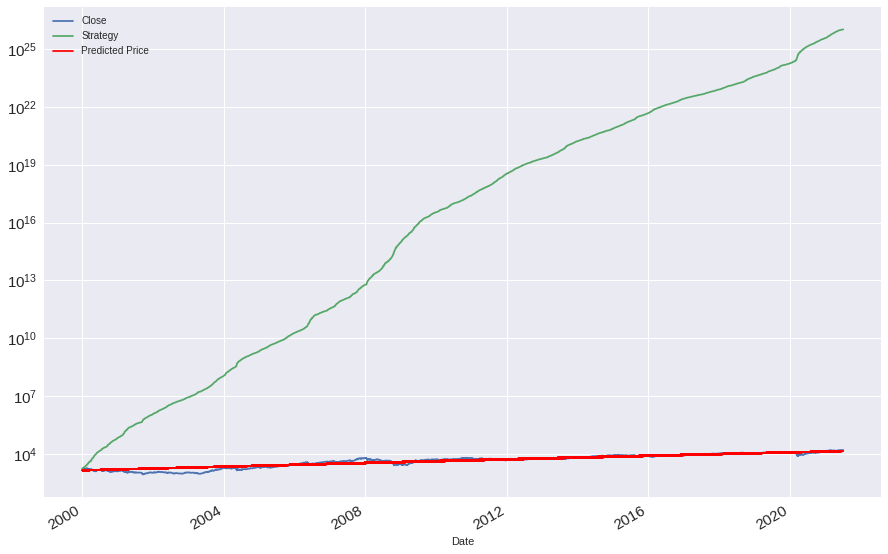

In [196]:
plt.figure(1, figsize=(16,10))


df[["Close", "Strategy"]].plot(figsize = (15,10), fontsize = 15,logy=True)
plt.plot(X_train, fitting, color='r', label='Predicted Price')
plt.legend()
plt.show()